REFERENCE :https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html
https://datagy.io/pandas-select-columns/

# Question 1

In [1]:
#Step 1. Import the necessary libraries
#import pandas

import pandas as pd

In [68]:
#Step 2. Import the dataset from this address: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
#Step 3. Assign it to a variable called users

users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', index_col=0, delimiter='|')
users


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [3]:
#Step 4. Discover what is the mean age per occupation

users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
#users.groupby('occupation').agg(TotalCount=('gender', 'count'), MaleCount=('gender', 'count')

GenderDataFrame = pd.DataFrame(users, columns=['occupation','gender'])

MaleDataFrame= GenderDataFrame[GenderDataFrame['gender'] =='M'].groupby(['occupation'])['gender'].count().astype(int)
TotalDataFrame= GenderDataFrame.groupby(['occupation'])['gender'].count().astype(int)
OutputDataFrame= MaleDataFrame/TotalDataFrame
OutputDataFrame.sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [5]:
#Step6: For each occupation, calculate the minimum and maximum ages

pd.DataFrame(users, columns=['occupation','age']).groupby("occupation")['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [6]:
#Step7: For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [7]:
#Step 8. For each occupation present the percentage of women and men
OccupationGenderDataframe = pd.DataFrame(users, columns=['occupation','gender'])
OccupationGenderWiseCount = OccupationGenderDataframe.groupby(['occupation','gender'])['gender'].count()
OccupationGenderTotalCount = OccupationGenderDataframe.groupby(['occupation'])['gender'].count()
(OccupationGenderWiseCount*100)/OccupationGenderTotalCount


occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

In [8]:
#Step 1. Import the necessary libraries
#import pandas

import pandas as pd

In [9]:
#Step 2. Import the dataset from this address:https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
#Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [10]:
#Step 4. Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [11]:
#Step 5. How many team participated in the Euro2012?

len(pd.unique(euro12['Team']))

16

In [12]:
#Step 6. What is the number of columns in the dataset?

len(euro12.columns)


35

In [13]:
#Step 7.View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards','Red Cards'])
discipline


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [15]:
#Step 9. Calculate the mean Yellow Cards given per Team

discipline['Yellow Cards'].mean()

7.4375

In [16]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [17]:
#Step 11. Select the teams that start with G
euro12[euro12['Team'].str.startswith('G')]['Team']


5    Germany
6     Greece
Name: Team, dtype: object

In [18]:
#Step 12. Select the first 7 columns
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
#Step 13. Select all columns except the last 3
euro12.iloc[:,0:-3]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [20]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia

TeamShootAccuDF = pd.DataFrame(euro12, columns=['Team','Shooting Accuracy'])
TeamShootAccuDF[TeamShootAccuDF['Team'].isin(["England","Italy", "Russia"])]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [21]:
#Step 1. Import the necessary libraries

import numpy as np
import pandas as pd

In [22]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
Series1_4 = pd.Series(np.random.randint(1,5, size=(100)))
Series1_4

0     4
1     1
2     1
3     1
4     2
     ..
95    2
96    3
97    2
98    2
99    3
Length: 100, dtype: int32

In [23]:
#• The second a random number from 1 to 3
Series1_3 = pd.Series(np.random.randint(1,4, size=(100)))
Series1_3

0     2
1     1
2     1
3     2
4     1
     ..
95    2
96    2
97    3
98    2
99    1
Length: 100, dtype: int32

In [24]:
#• The third a random number from 10,000 to 30,000
Series10000_30000 = pd.Series(np.random.randint(10000,30001, size=(100)))
Series10000_30000

0     26660
1     13186
2     29991
3     22202
4     15321
      ...  
95    20934
96    26579
97    15313
98    15215
99    10805
Length: 100, dtype: int32

In [25]:
#Step 3. Create a DataFrame by joinning the Series by column

ThreeSeriesDataFrame = pd.DataFrame({'Series1':Series1_4, 'Series2': Series1_3, 'Series3': Series10000_30000})
ThreeSeriesDataFrame

,Series1,Series2,Series3
0,4,2,26660
1,1,1,13186
2,1,1,29991
3,1,2,22202
4,2,1,15321
...,...,...,...
95,2,2,20934
96,3,2,26579
97,2,3,15313
98,2,2,15215


In [26]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
ThreeSeriesDataFrame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
ThreeSeriesDataFrame

,bedrs,bathrs,price_sqr_meter
0,4,2,26660
1,1,1,13186
2,1,1,29991
3,1,2,22202
4,2,1,15321
...,...,...,...
95,2,2,20934
96,3,2,26579
97,2,3,15313
98,2,2,15215


In [27]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([Series1_4,Series1_3,Series10000_30000])
bigcolumn

0         4
1         1
2         1
3         1
4         2
      ...  
95    20934
96    26579
97    15313
98    15215
99    10805
Length: 300, dtype: int32

#Step 6. Ops it seems it is going only until index 99. Is it true?
Yes

In [28]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.index = pd.RangeIndex(start=0, stop=300)
bigcolumn

0          4
1          1
2          1
3          1
4          2
       ...  
295    20934
296    26579
297    15313
298    15215
299    10805
Length: 300, dtype: int32

# Question 4

In [29]:
#Step 1. Import the necessary libraries


import pandas as pd
import numpy as np
import datetime

In [30]:
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data = pd.read_csv(r'wind.txt',sep="\s+",parse_dates= {'newdate' : ['Yr','Mo','Dy']})
data.columns

Index(['newdate', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA',
       'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')

In [31]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

def CorrectYear(input):
    return(datetime.date(input.year-100, input.month, input.day) if input.year > 2022 else input)

data['newdate'] = data['newdate'].apply(CorrectYear)
data

,newdate,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [32]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data["newdate"] = pd.to_datetime(data["newdate"])
print(data.dtypes)
data = data.set_index('newdate')
data

newdate    datetime64[ns]
RPT               float64
VAL               float64
ROS               float64
KIL               float64
SHA               float64
BIR               float64
DUB               float64
CLA               float64
MUL               float64
CLO               float64
BEL               float64
MAL               float64
dtype: object


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
newdate,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [33]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

print(data.isna().sum())

# dropping to ingnore in next problems
data.dropna()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
newdate,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [34]:
#Step 7. Compute how many non-missing values there are in total.

data.notna().sum().sum()

78857

In [35]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
# A single number for the entire dataset.

data.mean().mean()

10.227982360836924

In [36]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
# windspeeds and standard deviations of the windspeeds at each location over all the 
# days
# A different set of numbers for each location.


loc_stats = data.agg(['min','max','mean','std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [37]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each 
# day. A different set of numbers for each day.


day_stats = pd.concat([data.min(axis=1), data.max(axis=1), data.mean(axis=1), data.std(axis=1)], axis=1)
day_stats.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'}, inplace=True)
day_stats


,Min,Max,Mean,Std
newdate,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [38]:
# Step 11. Find the average windspeed in January for each location.
# Treat January 1961 and January 1962 both as January.

data.loc[data.index.month == 1].mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [39]:
# Step 12. Downsample the record to a yearly frequency for each location.

data.resample('Y').count()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
newdate,,,,,,,,,,,,
1961-12-31,360,362,363,361,363,365,362,363,362,364,365,362
1962-12-31,364,365,365,364,365,365,365,365,365,365,365,364
1963-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1964-12-31,366,366,366,366,366,366,366,366,366,366,366,366
1965-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1966-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1967-12-31,365,365,365,365,365,365,365,365,365,365,365,365
1968-12-31,366,366,366,366,366,366,366,366,366,366,366,366
1969-12-31,365,365,365,365,365,365,365,365,365,365,365,365


In [40]:
# Step 13. Downsample the record to a monthly frequency for each location.
data.resample('M').count()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
newdate,,,,,,,,,,,,
1961-01-31,30,30,31,31,29,31,31,30,31,31,31,31
1961-02-28,28,28,27,27,28,28,28,28,28,28,28,28
1961-03-31,30,31,31,30,31,31,31,31,29,31,31,30
1961-04-30,30,30,30,30,30,30,30,30,30,30,30,30
1961-05-31,31,30,31,30,31,31,30,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,31,31,31,31,31,31,31,31,31,31,31,31
1978-09-30,30,30,30,30,30,30,30,30,30,30,30,30
1978-10-31,31,31,31,31,31,31,31,31,31,31,31,31


In [41]:
# Step 14. Downsample the record to a weekly frequency for each location.
data.resample('W').count()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
newdate,,,,,,,,,,,,
1961-01-01,1,1,1,1,0,1,1,1,1,1,1,1
1961-01-08,7,6,7,7,7,7,7,6,7,7,7,7
1961-01-15,7,7,7,7,7,7,7,7,7,7,7,7
1961-01-22,7,7,7,7,6,7,7,7,7,7,7,7
1961-01-29,6,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-10,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-17,7,7,7,7,7,7,7,7,7,7,7,7


In [70]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
# windspeeds across all locations for each week (assume that the first week starts on 
# January 2 1961) for the first 52 weeks

newData = data.iloc [1:]
weekDF = newData.resample('W')
weekStatsDF= weekDF.agg(['min','max','mean','std'])
loc_stats.head(52)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
newdate                                                                  
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Question 5

In [43]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np


In [44]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [45]:
#Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [46]:
#Step 5. What is the number of observations in the dataset?

chipo['order_id'].count()


4622

In [47]:
#Step 6. What is the number of columns in the dataset?

len(chipo.columns)

5

In [48]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [49]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [50]:
#Step 9. Which was the most-ordered item?

chipo.groupby('item_name')['order_id'].count().sort_values(ascending = False).head(1)


item_name
Chicken Bowl    726
Name: order_id, dtype: int64

In [51]:
#Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby('item_name')['order_id'].count().sort_values(ascending = False).head(1)[0]


726

In [52]:
#Step 11. What was the most ordered item in the choice_description column?

chipo.groupby('choice_description')['order_id'].count().sort_values(ascending = False).head(1)

choice_description
[Diet Coke]    134
Name: order_id, dtype: int64

In [53]:
#Step 12. How many items were orderd in total?

chipo['quantity'].sum()

4972

In [54]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

print(chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda item: float(item[1:-1]))
chipo['item_price'].dtype

object


dtype('float64')

In [55]:
#Step 14. How much was the revenue for the period in the dataset?

chipo['item_price'].sum().sum()


34500.16

In [56]:
#Step 15. How many orders were made in the period?

len(pd.unique(chipo['order_id']))

1834

In [57]:
#Step 16. What is the average revenue amount per order?

chipo.groupby('order_id')['item_price'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [58]:
#Step 17. How many different items are sold?

len(pd.unique(chipo['item_name']))

50

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


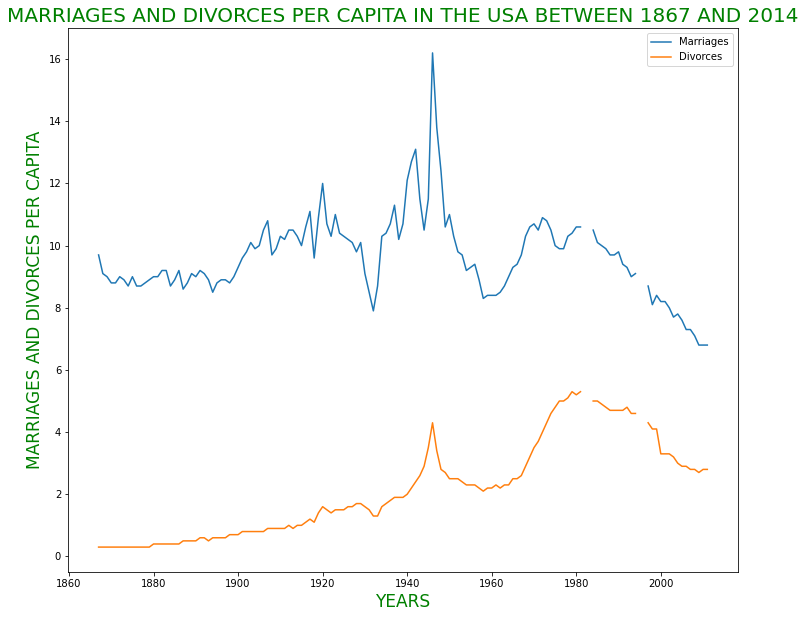

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

MDdataframe = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")

plt.rcParams["figure.figsize"] = [12, 10]
MDdataframe.plot( 'Year', ['Marriages_per_1000','Divorces_per_1000'],label=['Marriages', 'Divorces'])

plt.title('MARRIAGES AND DIVORCES PER CAPITA IN THE USA BETWEEN 1867 AND 2014', color = 'g', fontsize = 20)
plt.xlabel('YEARS', color = 'g', fontsize = 17)
plt.ylabel('MARRIAGES AND DIVORCES PER CAPITA', color = 'g', fontsize = 17)

plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

C:\Users\mahip\AppData\Local\Temp\ipykernel_13540\3651196984.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  MDdataframeNew[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()


([<matplotlib.axis.XTick at 0x16212261580>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

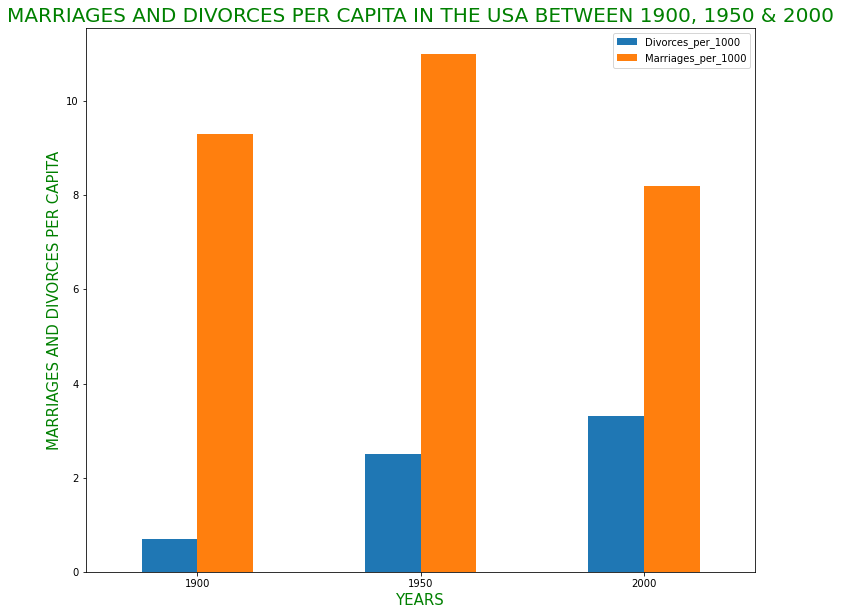

In [60]:
import numpy as np
import matplotlib.pyplot as plt

GetYears = (MDdataframe['Year'] == 1900) | (MDdataframe['Year'] == 1950) | (MDdataframe['Year'] == 2000) 
MDdataframeNew = MDdataframe.loc[GetYears, ['Year','Marriages_per_1000','Divorces_per_1000']]

MDdataframeNew[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("MARRIAGES AND DIVORCES PER CAPITA IN THE USA BETWEEN 1900, 1950 & 2000", color = 'g', fontsize = 20)
plt.xlabel('YEARS', color = 'g', fontsize = 15)
plt.ylabel('MARRIAGES AND DIVORCES PER CAPITA', color = 'g', fontsize = 15)
plt.xticks((0, 1, 2), ("1900", "1950", "2000"), rotation = 0)

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


Text(0, 0.5, 'ACTORS')

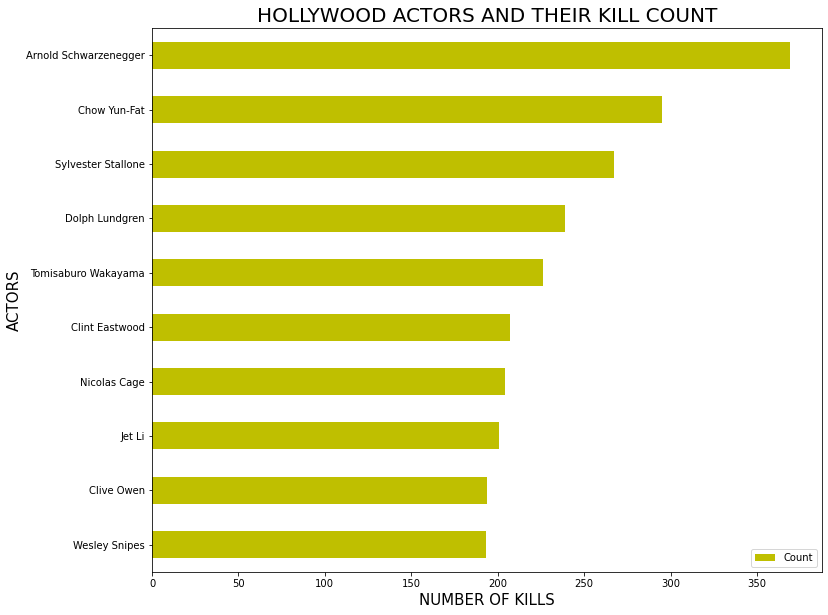

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

ActorKillsDF = pd.read_csv('actor_kill_counts.csv')

SortedDataFrame = ActorKillsDF.sort_values("Count", ascending = True)
SortedDataFrame.plot.barh(x='Actor', y='Count', color = 'y')

plt.title('HOLLYWOOD ACTORS AND THEIR KILL COUNT', fontsize=20)
plt.xlabel('NUMBER OF KILLS', color = 'k', fontsize = 15)
plt.ylabel('ACTORS', color = 'k', fontsize = 15)

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

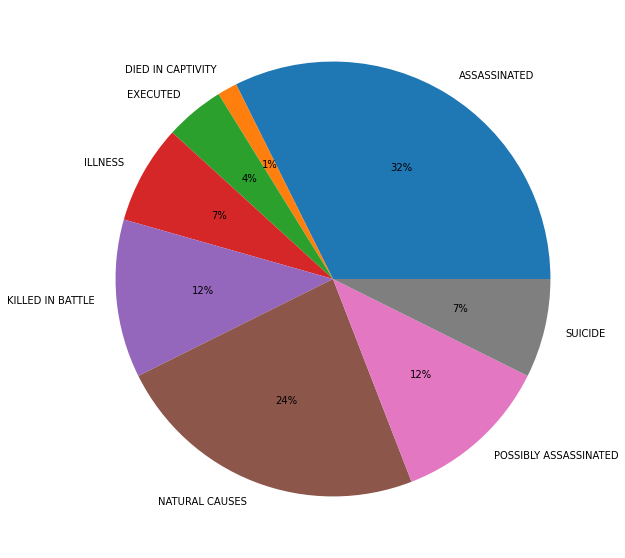

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

RomanEmperor = pd.read_csv(r'roman-emperor-reigns.csv')
RomanEmperor['Cause_of_Death'] = RomanEmperor['Cause_of_Death'].str.upper()
DeathCategory = RomanEmperor.groupby(['Cause_of_Death'])['Cause_of_Death'].count()
plt.pie(DeathCategory, labels = DeathCategory.index,autopct= lambda p:'{:.0f}%'.format(round(p)))
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.



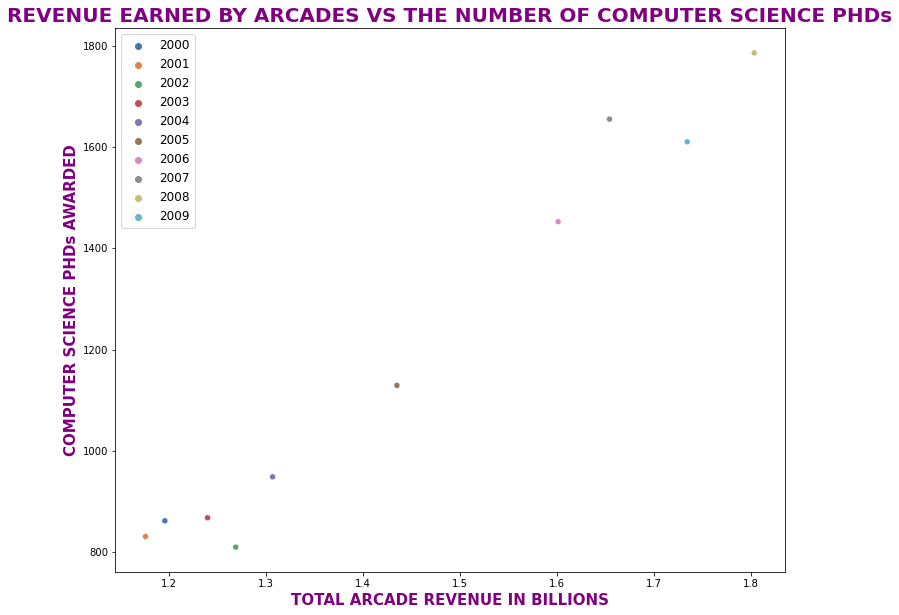

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ArcadeRevenueDF = pd.read_csv(r"arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', palette ='deep',data=ArcadeRevenueDF)

plt.title("REVENUE EARNED BY ARCADES VS THE NUMBER OF COMPUTER SCIENCE PHDs", color = "purple", fontsize = 20, fontweight='bold')
plt.xlabel("TOTAL ARCADE REVENUE IN BILLIONS", color = "purple", fontsize = 15 , fontweight='bold')
plt.ylabel("COMPUTER SCIENCE PHDs AWARDED", color = "purple",fontsize = 15, fontweight='bold')
plt.legend(fontsize = 12)

plt.show()
